### 유투브 데이터 시각화

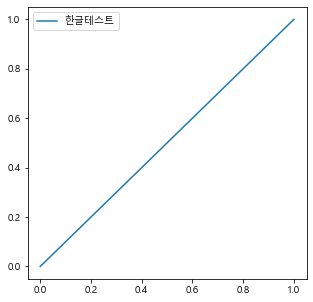

In [163]:
# 필수 라이브러리
import pandas as pd
import seaborn as sns

# 한글 폰트 설치
from matplotlib import rc
import matplotlib.font_manager as fm

# # 설치된 폰트 출력, 여기서 나눔이나 맑은 고딕을 찾아야함 없으면 설치
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

# 한글 폰트 테스트
import matplotlib as mpl
import matplotlib.pyplot as plt


font_path = plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],label='한글테스트')
plt.legend();

In [71]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기


In [72]:
df = pd.read_csv('KRvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


### EDA

In [73]:
# 데이터 수
df.shape

(34567, 16)

In [74]:
# 결측치 확인
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [76]:
# 필요한 컬럼만 추리고 중복 및 결측치 처리
df = df[['title','channel_title', 'views']]
df.head()

,title,channel_title,views
0,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,156130
1,JSA 귀순 북한군 총격 부상,Edward,76533
2,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,421409
3,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,222850
4,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,84466


In [77]:
df_sorted = df.sort_values(by='views', ascending=False)
df_sorted

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4678,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
3750,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,84281319
...,...,...,...
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
17414,애슐리 18년도 딸기축제 영상❣,ashley wow,2919
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


In [78]:
# 중복값 제거
# keep='first'를 통해 높은거만 남길 수 있음
df_sorted_max = df_sorted.drop_duplicates(['title','channel_title'], keep='first')
df_sorted_max

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
28554,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600
26391,VENOM - Official Trailer (HD),Sony Pictures Entertainment,49185287
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),jungbub2013,3509
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


In [79]:
len(df_sorted) - len(df_sorted_max)

18138

### 시각화 - 조회수 합계 기준 TOP 100

In [80]:
# 그룹바이로 채널 타이틀로 각각 묶고 그 합계를 자동적으로 .sum()으로 수치를 계산
df_channel_view_sum = df_sorted_max.groupby(df_sorted_max['channel_title']).sum()
df_channel_view_sum

,views
channel_title,
! 세상에 무슨일이,1052789
!t Live,194690
# 정국적으로 뷔가내릴슈가,21698
#Drama Planet,112340
#tae_tae,122499
...,...
힙합 스페이스 (HIPHOP SPACE),482755
힙합 좋아하는여자,833951
힙합 플레이어 _,79585


In [81]:
# 정렬
df_channel_view = df_channel_view_sum.sort_values(by='views', ascending=False)
df_channel_view

,views
channel_title,
ibighit,187757328
Marvel Entertainment,174161670
jypentertainment,118541123
YouTube Spotlight,113876217
MLG Highlights,78061767
...,...
메이플스토리2 MSG TV,3954
IfreeMusic,3725
여름감기 from OSW,3268


In [86]:
# 100개만 뽑음
df_channnel_view_top = df_channel_view[:100]
df_channnel_view_top

,views
channel_title,
ibighit,187757328
Marvel Entertainment,174161670
jypentertainment,118541123
YouTube Spotlight,113876217
MLG Highlights,78061767
...,...
[Dorothy]도로시,11275375
필름에빠지다,11174308
The Late Show with Stephen Colbert,11157085


In [89]:
# 인덱싱이 없으니 .reset_index() 함수로 추가
df_channnel_view_top = df_channnel_view_top.reset_index()
df_channnel_view_top

,channel_title,views
0,ibighit,187757328
1,Marvel Entertainment,174161670
2,jypentertainment,118541123
3,YouTube Spotlight,113876217
4,MLG Highlights,78061767
...,...,...
95,[Dorothy]도로시,11275375
96,필름에빠지다,11174308
97,The Late Show with Stephen Colbert,11157085
98,신의한수,10866674


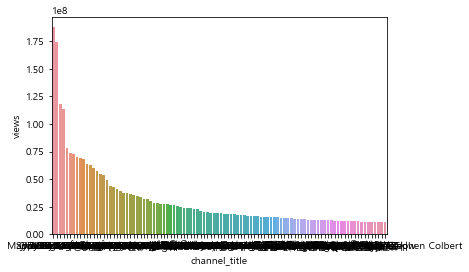

In [90]:
# 뽑은 데이터로 시각화
sns.barplot(x='channel_title', y='views', data=df_channnel_view_top);

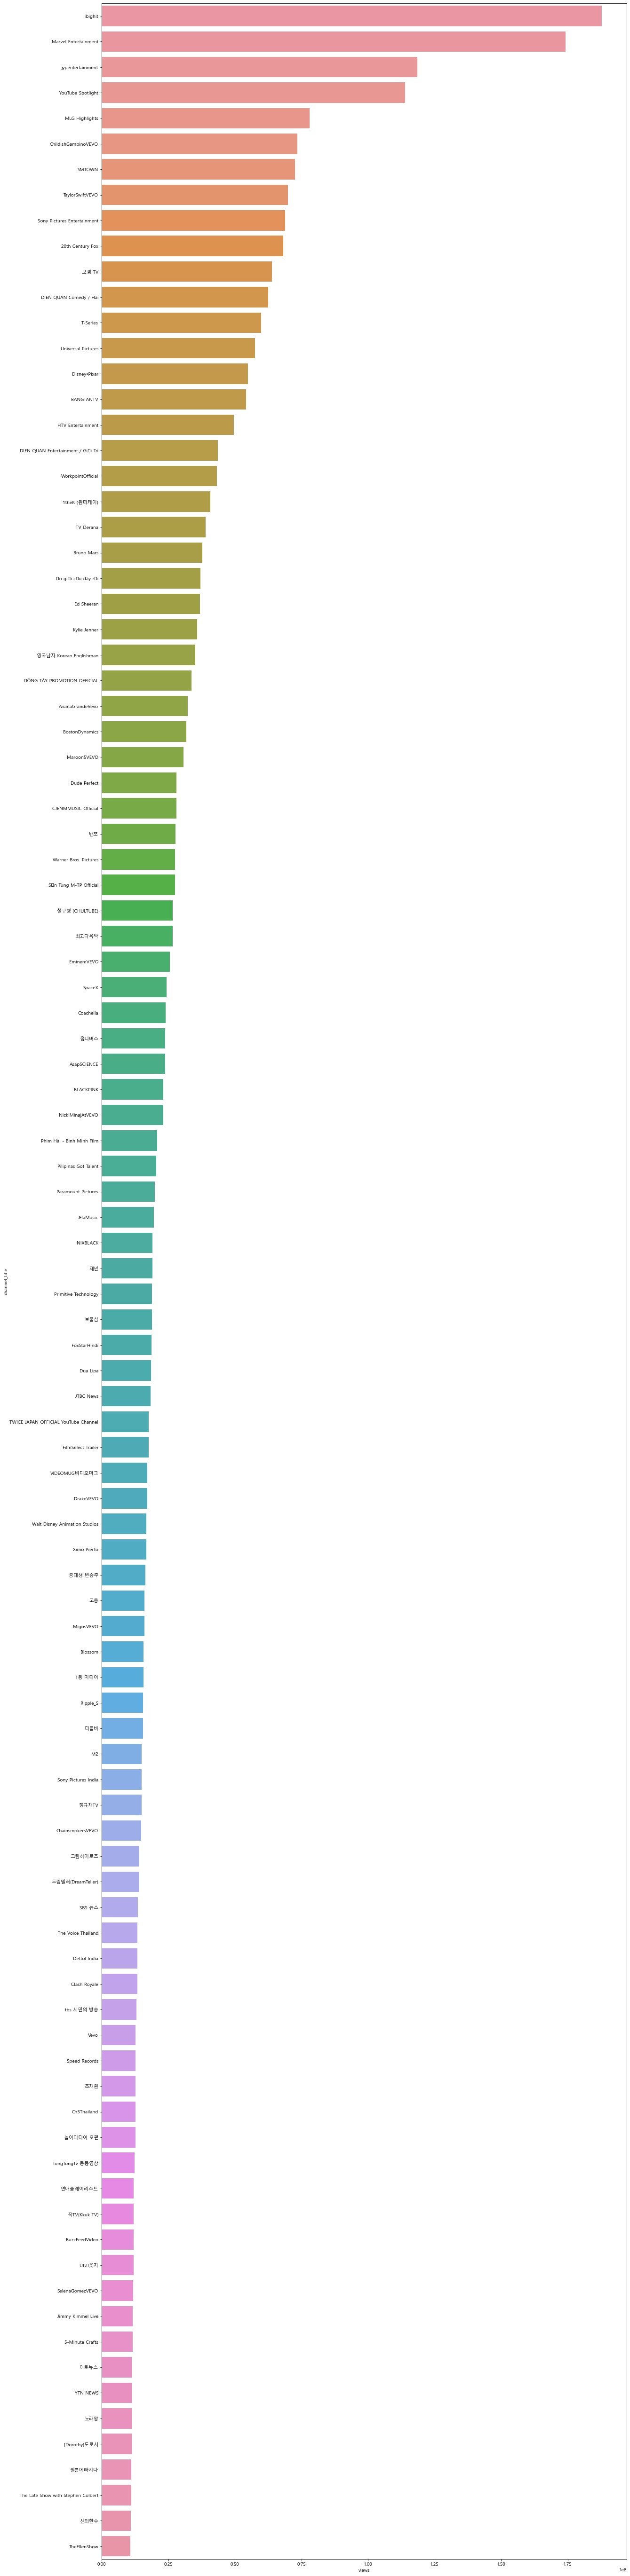

In [91]:
# 사이즈 조정
plt.figure(figsize=(20, 100))
sns.barplot(x='views', y='channel_title', data=df_channnel_view_top);

### 인기 영상 타이틀 분석

In [139]:
df = pd.read_csv('KRvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [140]:
# 필요 컬럼만 뽑기
df = df[['title', 'views']]
df

,title,views
0,좋아 by 민서_윤종신_좋니 답가,156130
1,JSA 귀순 북한군 총격 부상,76533
2,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),421409
3,"이명박 출국 현장, 놓치면 안되는 장면",222850
4,김장겸은 물러갔다 MBC 노조 환호와 눈물,84466
...,...,...
34562,장모님 가게한다고 1억만 달라는 아내 사이다카톡,156439
34563,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],130948
34564,2018년 6월 13일 아침 뉴스,62555
34565,워너원 웃음 참기 영상 워너원 GO X-con.ver,63306


In [141]:
# 중복 제거 및 정렬
df_sorted = df.sort_values(by='views', ascending=False).drop_duplicates(['title'], keep='first')
df_sorted

,title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
28554,Childish Gambino - This Is America (Official V...,73432600
26391,VENOM - Official Trailer (HD),49185287
...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
4806,다니엘 생일 축하해!,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


In [142]:
df_sorted['title'].values

array(['YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
       "Marvel Studios' Avengers: Infinity War Official Trailer",
       "BTS (방탄소년단) 'FAKE LOVE' Official MV", ...,
       '[홍익인간 인성교육] 7128강 산에 들어가고 싶다',
       '만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그', '소셜 잠금화면 앱 (달고나)'],
      dtype=object)

### 정규 표현식을 써서 한글 제목만 남기기

In [143]:
import re
# .apply() -> 각각의 열을 돌면서 적용 시킴
# .sub('적용할 정규 표현식', '바꿀것', 데이터)
# 한글데이터 및 띄어쓰기가 아니면 ''으로 바꿈
df_sorted['title_refined'] = df_sorted['title'].apply(lambda x: re.sub('[^가-힣\s]', '', x))
df_sorted

,title,views,title_refined
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245,
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
28554,Childish Gambino - This Is America (Official V...,73432600,
26391,VENOM - Official Trailer (HD),49185287,
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


In [144]:
# 공백 열 삭제
df_sorted['another_refined'] = df_sorted['title_refined'].apply(lambda x: re.sub('[^가-힣]', '', x))
df_sorted

,title,views,title_refined,another_refined
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,,
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245,,
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,방탄소년단
28554,Childish Gambino - This Is America (Official V...,73432600,,
26391,VENOM - Official Trailer (HD),49185287,,
...,...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,홍익인간인성교육강해외여행증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,다니엘생일축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,홍익인간인성교육강산에들어가고싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,만취브이로그서프라이즈생일파티실시간현실술판여자셋일상일상브이로그


In [145]:
# 공백 열 삭제
df_sorted = df_sorted[df_sorted['title_refined'].apply(lambda x: re.sub('[^가-힣]', '', x)) !='']
df_sorted

,title,views,title_refined,another_refined
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,방탄소년단
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,방탄소년단
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,방탄소년단
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,레드벨벳
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,백일몽
...,...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,홍익인간인성교육강해외여행증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,다니엘생일축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,홍익인간인성교육강산에들어가고싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,만취브이로그서프라이즈생일파티실시간현실술판여자셋일상일상브이로그


### 한글 단어 추출


In [146]:
# 구글링을 통해 사용법 참조

from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(df_sorted['title_refined'].values) # list of str or like
words = word_extractor.extract()
words

training was done. used memory 0.664 Gb
all cohesion probabilities was computed. # words = 211
all branching entropies was computed # words = 15680
all accessor variety was computed # words = 15680


{'허': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.6541795122411234, right_branching_entropy=0, left_accessor_variety=19, right_accessor_variety=0, leftside_frequency=108, rightside_frequency=0),
 '되': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.1452265012303133, right_branching_entropy=0, left_accessor_variety=17, right_accessor_variety=0, leftside_frequency=152, rightside_frequency=0),
 '훈': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=1.0986122886681096, right_branching_entropy=2.689108823798165, left_accessor_variety=3, right_accessor_variety=20, leftside_frequency=0, rightside_frequency=129),
 '풀': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.899504397850104, right_branching_entropy=1.3689223607402192, left_accessor_variety=32, right_accessor_variety=4, leftside_frequency=188, rightside_frequency=0),
 '좋': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_ent

In [147]:
# LTokenizer로 L-R로 분리
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [150]:
df_sorted['title_refined']

30844                                  방탄소년단    
2788                                방탄소년단       
28605                               방탄소년단       
13442                                    레드벨벳   
17879                                       백일몽 
                          ...                   
13423                       홍익인간 인성교육 강 해외여행 증가 
4806                                  다니엘 생일 축하해
18568                     홍익인간 인성교육 강 산에 들어가고 싶다
509      만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그
1071                               소셜 잠금화면 앱 달고나
Name: title_refined, Length: 14906, dtype: object

In [149]:
df_sorted['title_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))

30844                                            [방탄소년단]
2788                                             [방탄소년단]
28605                                            [방탄소년단]
13442                                               [레드]
17879                                              [백일몽]
                              ...                       
13423                          [홍익인간, 인성교육, 강, 해외여행, 증가]
4806                                      [다니엘, 생일, 축하해]
18568                      [홍익인간, 인성교육, 강, 산에, 들어가고, 싶다]
509      [만취, 브이로그서프라이즈, 생일, 파티실시간, 현실, 술판여자셋, 일상일상브이로그]
1071                                  [소셜, 잠금화면, 앱, 달고나]
Name: title_refined, Length: 14906, dtype: object

In [151]:
# remove_r=True 를 통해 R부분을 바로 제거 가능 하다
df_sorted['tokenized'] = df_sorted['title_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))
df_sorted

,title,views,title_refined,another_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,레드벨벳,[레드]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,백일몽,[백일몽]
...,...,...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,홍익인간인성교육강해외여행증가,"[홍익인간, 인성교육, 강, 해외여행, 증가]"
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,다니엘생일축하해,"[다니엘, 생일, 축하해]"
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,홍익인간인성교육강산에들어가고싶다,"[홍익인간, 인성교육, 강, 산에, 들어가고, 싶다]"
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,만취브이로그서프라이즈생일파티실시간현실술판여자셋일상일상브이로그,"[만취, 브이로그서프라이즈, 생일, 파티실시간, 현실, 술판여자셋, 일상일상브이로그]"


### 워드클라우드

In [153]:
# 뷰가 50만 이상만 거름
df_top = df_sorted[df_sorted['views'] > 500000]
df_top

,title,views,title_refined,another_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,레드벨벳,[레드]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,백일몽,[백일몽]
...,...,...,...,...,...
32727,"중딩 커플의 키스, 친구들한텐 비밀인 이유 [진짜사랑 리턴즈2 11-1]",502090,중딩 커플의 키스 친구들한텐 비밀인 이유 진짜사랑 리턴즈,중딩커플의키스친구들한텐비밀인이유진짜사랑리턴즈,"[중딩, 커플의, 키스, 친구, 비밀, 이유, 진짜, 리턴즈]"
3876,"문 대통령, JSA 장병 초청... '명예 소령' 이국종 교수도 참석/비디오머그",501508,문 대통령 장병 초청 명예 소령 이국종 교수도 참석비디오머그,문대통령장병초청명예소령이국종교수도참석비디오머그,"[문, 대통령, 장병, 초청, 명예, 소령, 이국종, 교수도, 참석비디오머그]"
11219,윤식당2 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,501469,윤식당 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,윤식당방문한우크라이나블로거가공개하는비하인드및인터뷰,"[윤식당, 방문한, 우크라이나, 블로거가, 공개, 비하인드, 및, 인터뷰]"
20576,"♥좋아싫어해♥(スキキライ) 태쁘 & 엔찬 커플송! (커버송, Cover) [Pre...",500972,좋아싫어해 태쁘 엔찬 커플송 커버송 쁘띠허브,좋아싫어해태쁘엔찬커플송커버송쁘띠허브,"[좋아싫어해, 태쁘, 엔찬, 커플송, 커버송, 쁘띠허브]"


In [158]:
# 50만 이상 걸러진 데이터의 토크나이저 단어들을 한곳에 모아서 빈도수 파악
words = []
for i in df_top['tokenized'].values:
    #print(i) i는 현재 각각의 배열 형식으로 넘어옴
    for k in i:
        #print(k) 배열 형식에서 하나씩 빼서 다시 하나의 리스트 형식으로 바꿈
        words.append(k)
        
words

['방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '레드',
 '백일몽',
 '방탄소년단',
 '방탄소년단',
 '여자',
 '밤',
 '방탄소년단',
 '레드',
 '피카부',
 '방탄소년단',
 '방탄소년단',
 '워너원',
 '약속해요',
 '선미',
 '주인공',
 '워너원',
 '부메랑',
 '엑소',
 '종현',
 '빈소',
 '방탄소년단',
 '등',
 '애도',
 '이어져',
 '샤이니',
 '종현',
 '빛이',
 '나',
 '워너원',
 '켜줘',
 '종현',
 '발인',
 '음악에',
 '열정',
 '넘쳤던',
 '가수',
 '영면동료들',
 '마지막',
 '길',
 '눈물',
 '배웅',
 '샤이니',
 '빙글뱅글',
 '워너원',
 '사랑',
 '했다',
 '샤이니',
 '데리러',
 '가',
 '텔레콤',
 '연아와',
 '성빈이의',
 '이야기',
 '현아',
 '방예담',
 '프리',
 '배틀',
 '시간',
 '능력을',
 '가진',
 '남자',
 '여성에게',
 '한',
 '행동',
 '방탄소년단',
 '샤이니',
 '종현',
 '빈소',
 '찾은',
 '소녀시대',
 '써니',
 '멈추지',
 '않는',
 '눈물',
 '동영상',
 '단독',
 '조현민',
 '에이',
 '폭언',
 '음성파일',
 '공개',
 '방탄소년단',
 '방탄',
 '꽃',
 '길',
 '직캠',
 '트와이스',
 '직캠',
 '김정은',
 '웃게',
 '한',
 '제주소년',
 '오연준의',
 '바람이',
 '불어오는',
 '곳비디오머그',
 '내',
 '여자',
 '개',
 '쩌는듯',
 '엔시티',
 '드림',
 '아내를',
 '낯선사람',
 '차에',
 '태우면',
 '안되는',
 '이유',
 '레드',
 '피카부',
 '방탄소년단',
 '여자',
 '시청자들',
 '빵터지게한',
 '선수',
 '대화',
 '이엑스아이디',
 '내일해',
 '뮤직',
 '비디오',
 '가요대축제',
 '방탄소년단',
 '병맛더빙',
 '급식생',
 '콜롬

In [160]:
# 빈도수 체크
from collections import Counter
count = Counter(words)

count

Counter({'방탄소년단': 50,
         '레드': 19,
         '백일몽': 1,
         '여자': 48,
         '밤': 4,
         '피카부': 5,
         '워너원': 10,
         '약속해요': 2,
         '선미': 3,
         '주인공': 2,
         '부메랑': 1,
         '엑소': 2,
         '종현': 27,
         '빈소': 10,
         '등': 5,
         '애도': 1,
         '이어져': 1,
         '샤이니': 22,
         '빛이': 1,
         '나': 2,
         '켜줘': 1,
         '발인': 5,
         '음악에': 1,
         '열정': 1,
         '넘쳤던': 1,
         '가수': 2,
         '영면동료들': 1,
         '마지막': 8,
         '길': 3,
         '눈물': 21,
         '배웅': 3,
         '빙글뱅글': 2,
         '사랑': 10,
         '했다': 7,
         '데리러': 3,
         '가': 3,
         '텔레콤': 1,
         '연아와': 1,
         '성빈이의': 1,
         '이야기': 13,
         '현아': 1,
         '방예담': 2,
         '프리': 1,
         '배틀': 7,
         '시간': 11,
         '능력을': 1,
         '가진': 2,
         '남자': 23,
         '여성에게': 1,
         '한': 17,
         '행동': 3,
         '찾은': 2,
         '소녀시대': 5,
       

In [165]:
# Counter 형태를 딕셔너리로 바꾼 후 진행
word_dict = dict(count)
word_dict

{'방탄소년단': 50,
 '레드': 19,
 '백일몽': 1,
 '여자': 48,
 '밤': 4,
 '피카부': 5,
 '워너원': 10,
 '약속해요': 2,
 '선미': 3,
 '주인공': 2,
 '부메랑': 1,
 '엑소': 2,
 '종현': 27,
 '빈소': 10,
 '등': 5,
 '애도': 1,
 '이어져': 1,
 '샤이니': 22,
 '빛이': 1,
 '나': 2,
 '켜줘': 1,
 '발인': 5,
 '음악에': 1,
 '열정': 1,
 '넘쳤던': 1,
 '가수': 2,
 '영면동료들': 1,
 '마지막': 8,
 '길': 3,
 '눈물': 21,
 '배웅': 3,
 '빙글뱅글': 2,
 '사랑': 10,
 '했다': 7,
 '데리러': 3,
 '가': 3,
 '텔레콤': 1,
 '연아와': 1,
 '성빈이의': 1,
 '이야기': 13,
 '현아': 1,
 '방예담': 2,
 '프리': 1,
 '배틀': 7,
 '시간': 11,
 '능력을': 1,
 '가진': 2,
 '남자': 23,
 '여성에게': 1,
 '한': 17,
 '행동': 3,
 '찾은': 2,
 '소녀시대': 5,
 '써니': 1,
 '멈추지': 1,
 '않는': 2,
 '동영상': 3,
 '단독': 1,
 '조현민': 2,
 '에이': 1,
 '폭언': 1,
 '음성파일': 2,
 '공개': 15,
 '방탄': 4,
 '꽃': 4,
 '직캠': 21,
 '트와이스': 10,
 '김정은': 15,
 '웃게': 1,
 '제주소년': 1,
 '오연준의': 1,
 '바람이': 3,
 '불어오는': 3,
 '곳비디오머그': 1,
 '내': 7,
 '개': 7,
 '쩌는듯': 1,
 '엔시티': 3,
 '드림': 1,
 '아내를': 2,
 '낯선사람': 1,
 '차에': 1,
 '태우면': 1,
 '안되는': 9,
 '이유': 51,
 '시청자들': 2,
 '빵터지게한': 1,
 '선수': 24,
 '대화': 1,
 '이엑스아이디': 1,
 '내일해': 1,
 '뮤직': 2,
 '

In [172]:
# 워드클라우드 세팅
from wordcloud import WordCloud
font_path='NanumSquareB.otf'
wordcloud = WordCloud(font_path=font_path, width=500,height=500, background_color='white').generate_from_frequencies(word_dict)


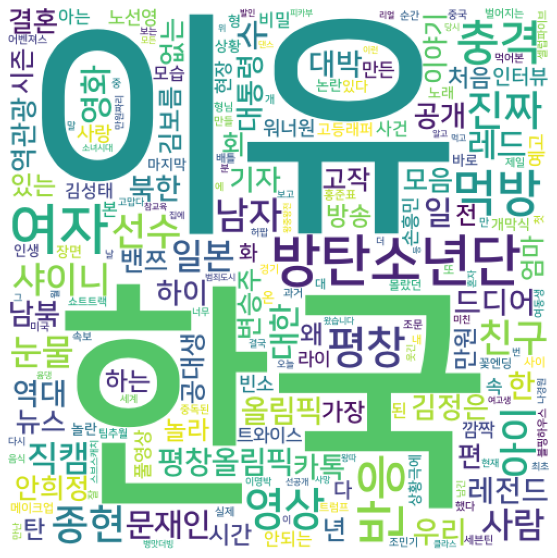

In [173]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off'); #x,y축 필요없으므로 off

In [174]:
stopwords={'탄','일','대','이','분','회','온','했다','화'}
for word in stopwords:
    word_dict.pop(word)